In [1]:
import pickle
from astropy import units as u
import spcphys_common_functions as scf
import numpy as np
from matplotlib import pyplot as plt
from datetime import timedelta

In [2]:
with open('cdf_files/cdf_files_data.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
_, mag_indices_align_to_pas = scf.time_window.slide_time_window(data['SOLO_L2S_MAG-RTN']['DATE'], align_to=data['SOLO_L2S_SWA-PAS-VDF']['DATE'])
mag_vec_mean = np.array([np.mean(data['SOLO_L2S_MAG-RTN']['B_RTN'][mag_indices_align_to_pas[i]], axis=0) for i in range(len(mag_indices_align_to_pas))])

In [4]:
e_b = mag_vec_mean / np.linalg.norm(mag_vec_mean)
e_r = np.tile(np.array([1, 0, 0]), (len(e_b), 1))
e_3 = np.cross(e_r, e_b)
e_2 = np.cross(e_3, e_r)
v_unit = np.array([np.array([e_r[i], e_2[i], e_3[i]]) for i in range(len(e_r))])

In [5]:
vdf_vec_t, vdf_value_t = scf.vdf_process.vdf_sph_to_cart(azimuth=data['SOLO_L2S_SWA-PAS-VDF']['Azimuth']*u.deg, elevation=data['SOLO_L2S_SWA-PAS-VDF']['Elevation']*u.deg, energy=data['SOLO_L2S_SWA-PAS-VDF']['Energy']*u.eV, vdf=data['SOLO_L2S_SWA-PAS-VDF']['vdf']*(u.s**3/u.m**6), v_unit_new=v_unit)
pdf_t, v_grid_t = scf.vdf_process.vdf_griddata_t(vdf_vec_t=vdf_vec_t, vdf_value_t=vdf_value_t, grid_size=20, multiprocess=50)

100%|██████████| 204/204 [00:23<00:00,  8.52it/s]


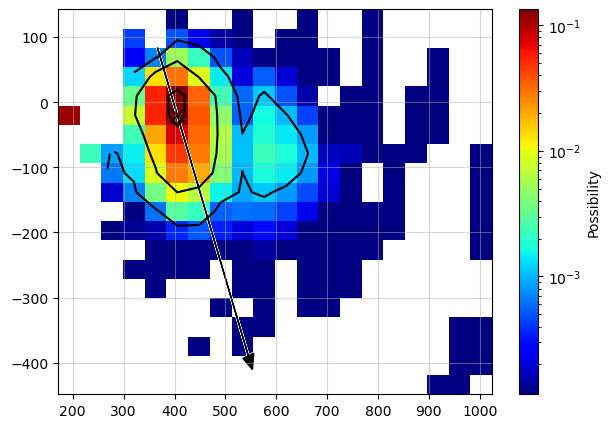

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

quadmesh = scf.vdf_process.plot_vdf_2d(axes=ax, pdf=pdf_t[-2], v_grid=v_grid_t[-2], compress_v_unit=2, core_marker=True, imf_vector=mag_vec_mean[-2]*u.nT, v_unit=v_unit[-2], clip_lower_percentage=0.5)
plt.colorbar(quadmesh, ax=ax, label='Possibility')


/tmp/ipykernel_2975823/515633451.py:4: UserWarning: Adding colorbar to a different Figure <Figure size 700x500 with 2 Axes> than <Figure size 2000x600 with 2 Axes> which fig.colorbar is called on.
  plt.colorbar(quadmesh, ax=ax, label='Possibility')


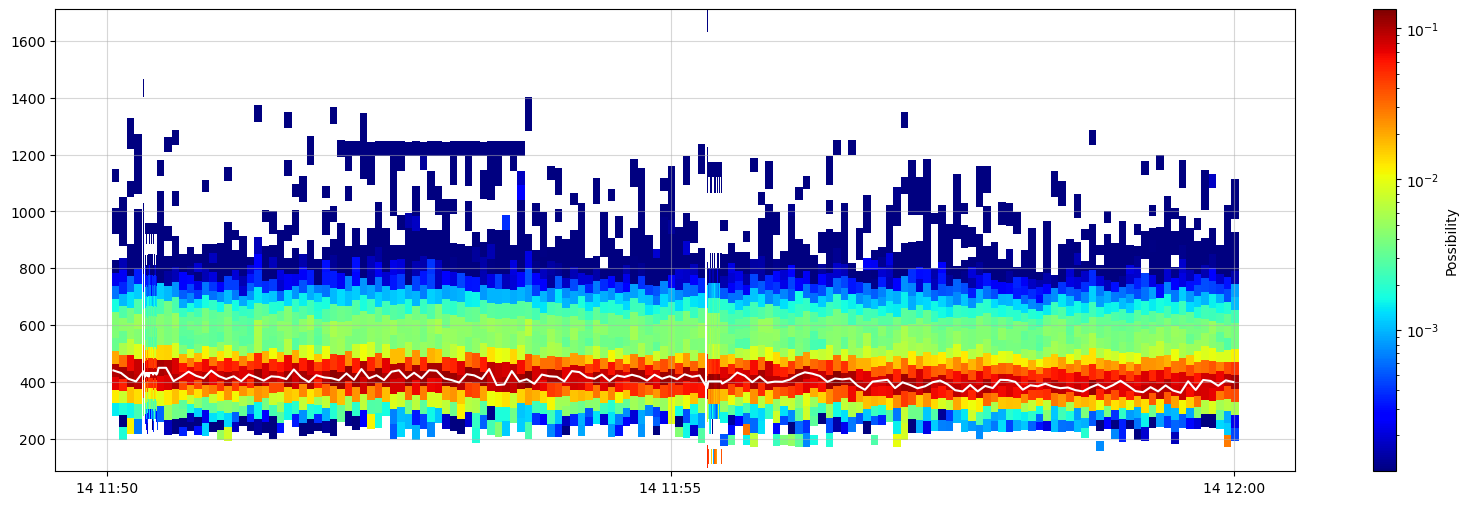

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

scf.vdf_process.plot_vdf_1d_t(axes=ax, time=data['SOLO_L2S_SWA-PAS-VDF']['DATE'], pdf_t=pdf_t, v_grid_t=v_grid_t, target_v_unit=0, core_line={'ls': '-', 'color': 'w'}, clip_lower_percentage=0.5)
plt.colorbar(quadmesh, ax=ax, label='Possibility')